Cargar librerias a utlizar

In [487]:
import numpy as np
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings

In [488]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LassoCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import median_absolute_error
import math

In [489]:
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn
from scipy import stats
from scipy.stats import norm, skew 
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #limita los float a tres decimales.

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# para el modelo
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNet, Lasso, LassoLarsIC
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb

#Gridsearch
from sklearn.model_selection import GridSearchCV

In [490]:

from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

In [491]:
#importando data
df = pd.read_csv(r'./houses_test_raw.csv', encoding= 'utf8')
df1 = pd.read_csv(r'./house_train_raw.csv', encoding= 'utf8')

Colocando el "Id" como indice

In [492]:
df.set_index("Id", inplace=True)
df1.set_index("Id", inplace=True)
df1.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Análizando los datos del dataset. principalmente el de text ya que el de train ya se habia previamente análizado junto con las metricas

In [493]:
print(df.shape)
df.head()

(1459, 79)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.000,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.000,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.000,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.000,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.000,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [494]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [495]:
df.isnull().sum()

MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
Street             0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 79, dtype: int64

Normalización de los datos sustituyendo valores nulos agregando la media a algunos valores numericos en algunos otros campos la moda o rellenando con cero.

In [496]:
df1["PoolQC"] = df1["PoolQC"].fillna("No tiene")
df1["MiscFeature"] = df1["MiscFeature"].fillna("No tiene")
df1["Alley"] = df1["Alley"].fillna("No tiene")
df1["Fence"] = df1["Fence"].fillna("No tiene")
df1["FireplaceQu"] = df1["FireplaceQu"].fillna("No tiene")
df1["LotFrontage"] = df1["LotFrontage"].fillna(df["LotFrontage"].median())
df1['GarageYrBlt'] = df1['GarageYrBlt'].fillna('No tiene')
df1['GarageType'] = df1['GarageType'].fillna('No tiene')
df1['GarageFinish'] = df1['GarageFinish'].fillna('No tiene')
df1['GarageQual'] = df1['GarageQual'].fillna('No tiene')
df1['GarageCond'] = df1['GarageCond'].fillna('No tiene')
df1['BsmtFinType2'] = df1['BsmtFinType2'].fillna('No tiene')
df1['BsmtExposure'] = df1['BsmtExposure'].fillna('No tiene')
df1['BsmtFinType1'] = df1['BsmtFinType1'].fillna('No tiene')
df1['BsmtCond'] = df1['BsmtCond'].fillna('No tiene')
df1['BsmtQual'] = df1['BsmtQual'].fillna('No tiene')
df1["MasVnrType"] = df1["MasVnrType"].fillna("No tiene")
df1["MasVnrArea"] = df1["MasVnrArea"].fillna(0)
df1['Electrical'] = df1['Electrical'].fillna(df['Electrical'].mode()[0])

In [497]:
df_na = df1.isnull().sum()
len(df_na[df_na != 0])

0

In [498]:
df["PoolQC"] = df["PoolQC"].fillna("No tiene")
df["MiscFeature"] = df["MiscFeature"].fillna("No tiene")
df["Alley"] = df["Alley"].fillna("No tiene")
df["Fence"] = df["Fence"].fillna("No tiene")
df["FireplaceQu"] = df["FireplaceQu"].fillna("No tiene")
df["LotFrontage"] = df["LotFrontage"].fillna(df["LotFrontage"].median())
df['GarageYrBlt'] = df['GarageYrBlt'].fillna('No tiene')
df['GarageType'] = df['GarageType'].fillna('No tiene')
df['GarageFinish'] = df['GarageFinish'].fillna('No tiene')
df['GarageQual'] = df['GarageQual'].fillna('No tiene')
df['GarageCond'] = df['GarageCond'].fillna('No tiene')
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('No tiene')
df['BsmtExposure'] = df['BsmtExposure'].fillna('No tiene')
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('No tiene')
df['BsmtCond'] = df['BsmtCond'].fillna('No tiene')
df['BsmtQual'] = df['BsmtQual'].fillna('No tiene')
df["MasVnrType"] = df["MasVnrType"].fillna("No tiene")
df["MasVnrArea"] = df["MasVnrArea"].fillna(0)
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])
df.fillna(0, inplace=True)

In [499]:
df_na = df.isnull().sum()
len(df_na[df_na != 0])

0

dividimos las Columna numericas de las categoricas para poder normalizar los datos ajustandolos a una distribución normal
esto para los dos dataset

In [500]:
columnas_numericas = list(df.dtypes[df.dtypes != 'object'].index)
columnas_numericast = list(df1.dtypes[df1.dtypes != 'object'].index)

In [501]:
skew = df1[columnas_numericast].apply(lambda columna: columna.skew(), axis=0)
kurt = df1[columnas_numericast].apply(lambda columna: columna.kurt(), axis=0)
skew_kurt1 = pd.concat([skew, kurt], axis=1)
skew_kurt1.shape

(36, 2)

In [502]:
skew = df[columnas_numericas].apply(lambda columna: columna.skew(), axis=0)
kurt = df[columnas_numericas].apply(lambda columna: columna.kurt(), axis=0)
skew_kurt = pd.concat([skew, kurt], axis=1)
skew_kurt.shape

(35, 2)

obtenemos el indice de sdew y kurt, entre mas cercano sea a cero el valor significa que tiene una mejor disposición lineal en sus datos.

In [503]:
skew_kurt.sort_values([0], ascending=[False])

,0,1
PoolArea,20.197,445.661
MiscVal,20.075,471.517
LowQualFinSF,16.167,308.677
3SsnPorch,12.524,170.200
EnclosedPorch,4.669,40.129
KitchenAbvGr,4.079,17.472
BsmtFinSF2,4.043,17.682
ScreenPorch,3.788,17.240
BsmtHalfBath,3.783,13.576
LotArea,3.115,20.747


separamos las columnas que tienen vaores de indice mayor al 0.75 ya que requieren ser ajustados con el proposito de acercarlos a cero.

In [504]:
columnas_alto_skewed1 = skew_kurt1.loc[abs(skew_kurt1[0]) > 0.75].index
columnas_alto_skewed1

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtHalfBath', 'KitchenAbvGr',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice'],
      dtype='object')

In [505]:
columnas_alto_skewed = skew_kurt.loc[abs(skew_kurt[0]) > 0.75].index
columnas_alto_skewed

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtHalfBath', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'],
      dtype='object')

Se aplica una transformación logaritmica a las columnas consideradas la de mayor indices de skew y kurt

In [506]:
for columna in columnas_alto_skewed1:
    df1[columna] = np.log1p(df1[columna])

In [507]:
#hacemos transformacion logaritmica a cada una de las columnas
for columna in columnas_alto_skewed:
    df[columna] = np.log1p(df[columna])

In [508]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   float64
 1   MSZoning       1459 non-null   object 
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   float64
 4   Street         1459 non-null   object 
 5   Alley          1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1459 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearB

aplicamos la misma transformación logaritmica a el precio de venta la cual ser nuestra variable a predecir y visualizamos graficamente cual fue el ajuste de los datos


 mu = 2.57 and sigma = 0.03



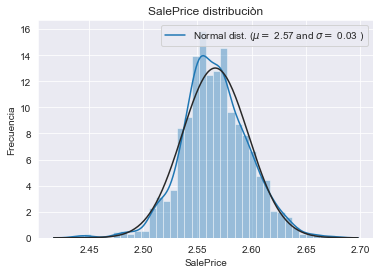

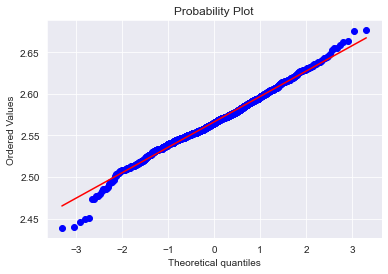

In [509]:
df1["SalePrice"] = np.log1p(df1["SalePrice"])

#Chequeamos la nueva distribuciòn
sns.distplot(df1['SalePrice'] , fit=norm);

#normalizamos los datos
(mu, sigma) = norm.fit(df1['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#graficamos la distribucion
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frecuencia')
plt.title('SalePrice distribuciòn')

#graficamos  los picos (QQ-plot)
fig = plt.figure()
res = stats.probplot(df1['SalePrice'], plot=plt)
plt.show()

In [510]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.000,3.819,0.688,3.045,3.045,3.932,4.263,5.252
LotFrontage,1460.000,4.209,0.314,3.091,4.111,4.220,4.382,5.749
LotArea,1460.000,9.111,0.517,7.171,8.930,9.157,9.359,12.280
OverallQual,1460.000,6.099,1.383,1.000,5.000,6.000,7.000,10.000
OverallCond,1460.000,5.575,1.113,1.000,5.000,5.000,6.000,9.000
YearBuilt,1460.000,1971.268,30.203,1872.000,1954.000,1973.000,2000.000,2010.000
YearRemodAdd,1460.000,1984.866,20.645,1950.000,1967.000,1994.000,2004.000,2010.000
MasVnrArea,1460.000,2.120,2.629,0.000,0.000,0.000,5.107,7.378
BsmtFinSF1,1460.000,4.230,2.992,0.000,0.000,5.952,6.570,8.639
BsmtFinSF2,1460.000,0.655,1.845,0.000,0.000,0.000,0.000,7.296


establecemos los datos que van a formar parte de la X y la y para X eliminamos la columna precio

In [511]:
y = df1.SalePrice
X = df1.drop(["SalePrice"], axis=1)

In [512]:
y.shape

(1460,)

In [513]:
X.shape

(1460, 79)

Establecemos las variables de entrenamiento y test

In [514]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,y,train_size=0.8, random_state=0)

seleccionamos las columnas con valores unicos menores o iguales a 50

In [515]:
categorical_cols=[cname for cname in X_train.columns 
                  if X_train[cname].nunique()<=50 and X_train[cname].dtype == "object"]

seleccionamos las columnasde tipo numericas.

In [516]:
numerical_cols=[cname for cname in X_train.columns 
                if X_train[cname].dtype in ["int64", "float64"]]

In [517]:
print("The number of categorical columns: ", len(categorical_cols))
print("The number of numerical columns: ", len(numerical_cols))

The number of categorical columns:  43
The number of numerical columns:  35


In [518]:
my_cols=categorical_cols+numerical_cols
X_train = X_train[my_cols]
X_val = X_val[my_cols]
X_test = df[my_cols]

In [519]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

Aplicamos algunas estrategias a los datos numericos para transformalos de la forma adecuada. utilizando simpleimputer.

In [520]:
numerical_transformer = Pipeline(steps=[
    ("imputer_num", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

In [521]:
categorical_transformer = Pipeline(steps = [
    ("imputer_cal", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

In [522]:
preprocessor = ColumnTransformer(transformers=[
    ("num", numerical_transformer, numerical_cols),
    ("cat", categorical_transformer, categorical_cols)
])

In [523]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0)

Previamente ejecutamos uan regresion de random forest

realizamos un prepocesso para luego aplicar un modeo de predicción

In [524]:
my_pipeline = Pipeline(steps=[ ("preprocessor", preprocessor),("model", rf)])

In [525]:
my_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MSSubClass', 'LotFrontage',
                                                   'LotArea', 'OverallQual',
                                                   'OverallCond', 'YearBuilt',
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'Low...
                                                   'LotConfig', 'LandSlope',
                                                   'Neighborhood', 'Condition1',
                                                   'Condition2', 'BldgType',
                                                   'HouseStyle', 'RoofStyle',
                                                   'RoofMatl', 'Exterior1st',
                                                   'Exterior2nd', 'MasVnrType',
                                                   'ExterQual', 'ExterCond',
                                                   'Foundation', 'BsmtQual',
                                                   'BsmtCond', 'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2', 'Heating',
                                                   'HeatingQC', 'CentralAir',
                                                   'Electrical', ...])])),
                ('model', RandomForestRegressor(random_state=0))])

In [526]:
val_preds = my_pipeline.predict(X_val)

establecemos algunas validaciones a los datos utlizando la metrica del error logaritmico cuadrado medio(RMSLE) y de cross mean validation scores y vemos que es muy bajo de 0.0107

In [527]:
from sklearn.metrics import mean_squared_error
print("Validation RMSLE: ",  mean_squared_error(y_val, val_preds,squared=False))

Validation RMSLE:  0.010744534722154805


Continuamos realizando la regresion sobre los valores de test
convertimos los campos categoricos a numericos y para luego utilizarlos en el analisis de una regresión lineal

In [528]:
X=df # df es el dataframe que corresponde a houses_test_raw

In [529]:
y.shape # este viene de dataframe houses_train_raw precio de venta tiene 1460 registros

(1460,)

In [530]:
y=y.drop(2) # Eliminamos uno para dejarlo con el mismo numero de registros que X

In [531]:
y.shape

(1459,)

In [532]:
X.shape

(1459, 79)

In [533]:
area_dummies = pd.get_dummies(X) #Cambiamos las variables categoricas a numericas

In [534]:
dt2=area_dummies.copy()  # se lo asignamos a X
X= dt2

In [535]:
X_train, X_val, y_train, y_val = train_test_split(X,y,train_size=0.80, random_state=0) # dividimos los valores como trainin y test

In [546]:
categorical_cols=[cname for cname in X_train.columns 
                  if X_train[cname].nunique()<=10 and X_train[cname].dtype == "object"]

In [547]:
numerical_cols=[cname for cname in X_train.columns 
                if X_train[cname].dtype in ["int64", "float64"]]

In [548]:
print("The number of categorical columns: ", len(categorical_cols)) # No tenemos variables categoricas las convertimos a numericas
print("The number of numerical columns: ", len(numerical_cols))

The number of categorical columns:  0
The number of numerical columns:  35


In [550]:
my_cols=categorical_cols+numerical_cols
X_train = X_train[my_cols]
X_val = X_val[my_cols]
X_test = df[my_cols]

In [551]:
numerical_transformer = Pipeline(steps=[                #realizamos transformaciones de los datos
    ("imputer_num", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
    ])

In [552]:
categorical_transformer = Pipeline(steps = [
    ("imputer_cal", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

In [553]:
preprocessor = ColumnTransformer(transformers=[
    ("num", numerical_transformer, numerical_cols),
    ("cat", categorical_transformer, categorical_cols)
])

In [554]:
from sklearn import linear_model
lr = linear_model.LinearRegression() #importo la regresion lineal

In [555]:
model = lr.fit(X_train, y_train) # se aplica a los datos de train

In [556]:
#Predicción 
y_pred = model.predict(X_val)

In [557]:
y_pred.T

array([2.56268329, 2.57147173, 2.55946945, 2.56124395, 2.56325628,
       2.56732646, 2.57151241, 2.5699459 , 2.56822062, 2.57825229,
       2.55782543, 2.56438901, 2.56956295, 2.55980121, 2.56553586,
       2.57151647, 2.57758804, 2.56698262, 2.5766348 , 2.55787515,
       2.57214728, 2.56859338, 2.55989045, 2.55656505, 2.5613641 ,
       2.5635039 , 2.56395762, 2.55708964, 2.56760603, 2.56622322,
       2.56947463, 2.5582183 , 2.56825771, 2.56663151, 2.55808769,
       2.56262344, 2.5700174 , 2.56759984, 2.563695  , 2.56313502,
       2.56856555, 2.57106501, 2.56082099, 2.56823522, 2.55627723,
       2.56001493, 2.56839696, 2.5680162 , 2.56343982, 2.57162466,
       2.55372038, 2.57648074, 2.56827434, 2.57125509, 2.55808902,
       2.55479045, 2.57031776, 2.55561269, 2.57020162, 2.56591641,
       2.56140997, 2.5677048 , 2.56427489, 2.57814415, 2.5694545 ,
       2.57214684, 2.55687576, 2.56603337, 2.56114099, 2.56787447,
       2.57077669, 2.56475934, 2.56936884, 2.56471483, 2.56908

In [558]:
pred_test =  pd.DataFrame(y_pred)
pred_test

,0
0,2.563
1,2.571
2,2.559
3,2.561
4,2.563
...,...
287,2.565
288,2.564
289,2.566
290,2.572


In [559]:

pred_test.to_csv('pred_test.csv', index=False)


In [560]:
from sklearn.metrics import mean_squared_error
print("Validation RMSLE: ",  mean_squared_error(y_val,y_pred,squared=False))

Validation RMSLE:  0.0314923966708201
